An analysis of monthly expenditure month on month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Logistics.csv', delimiter=';')  
df.head()


,ApprovalId,Transaction Id,Transaction Type,Transaction Status,Date,Account Name,Account Number,Account Type,Payment Category,Cheque Number,...,Initiated By,Approved/Rejected By,Receipt Number,Reference Id,Amount,Charges,Commission Amount,Debit,Credit,Balance After
0,11244964.0,12367005,Payment,Successful,18/11/2024 11:28:32 AM,Elizaphan Ombaso,254713947710,MpesaPhoneNumber,NaN,NaN,...,Dwallo Elias,Dwallo Elias,SKI686SDDI,NaN,"2.700,00","40,00","0,00","2.740,00",NaN,"279,00"
1,11244937.0,12366966,Payment,Successful,18/11/2024 11:24:46 AM,Francis Ndeta,254796773030,MpesaPhoneNumber,NaN,NaN,...,Dwallo Elias,Dwallo Elias,SKI486ABAO,NaN,"7.800,00","40,00","0,00","7.840,00",NaN,"3.019,00"
2,11244912.0,12366928,Payment,Successful,18/11/2024 11:20:29 AM,Chrispinus Odera,254796773030,MpesaPhoneNumber,NaN,NaN,...,Dwallo Elias,Dwallo Elias,SKI685QE9Y,NaN,"7.800,00","40,00","0,00","7.840,00",NaN,"10.859,00"
3,11244883.0,12366897,Payment,Successful,18/11/2024 11:17:00 AM,Peter Thuku,254723476055,MpesaPhoneNumber,NaN,NaN,...,Dwallo Elias,Dwallo Elias,SKI1859YMN,NaN,"8.400,00","40,00","0,00","8.440,00",NaN,"18.699,00"
4,11244869.0,12366860,Payment,Successful,18/11/2024 11:14:31 AM,John Irungu,254720736996,MpesaPhoneNumber,NaN,NaN,...,Dwallo Elias,Dwallo Elias,SKI584YKF9,NaN,"7.500,00","40,00","0,00","7.540,00",NaN,"27.139,00"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApprovalId            376 non-null    float64
 1   Transaction Id        407 non-null    int64  
 2   Transaction Type      407 non-null    object 
 3   Transaction Status    407 non-null    object 
 4   Date                  407 non-null    object 
 5   Account Name          391 non-null    object 
 6   Account Number        338 non-null    object 
 7   Account Type          376 non-null    object 
 8   Payment Category      0 non-null      float64
 9   Cheque Number         0 non-null      float64
 10  Remark                391 non-null    object 
 11  Initiated By          376 non-null    object 
 12  Approved/Rejected By  372 non-null    object 
 13  Receipt Number        393 non-null    object 
 14  Reference Id          0 non-null      float64
 15  Amount                4

In [3]:
df = df.drop(['Payment Category', 'Reference Id','Cheque Number'], axis=1)


In [4]:
print(df.columns)


Index(['ApprovalId', 'Transaction Id', 'Transaction Type',
       'Transaction Status', 'Date', 'Account Name', 'Account Number',
       'Account Type', 'Remark', 'Initiated By', 'Approved/Rejected By',
       'Receipt Number', 'Amount', 'Charges', 'Commission Amount', 'Debit',
       'Credit', 'Balance After'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApprovalId            376 non-null    float64
 1   Transaction Id        407 non-null    int64  
 2   Transaction Type      407 non-null    object 
 3   Transaction Status    407 non-null    object 
 4   Date                  407 non-null    object 
 5   Account Name          391 non-null    object 
 6   Account Number        338 non-null    object 
 7   Account Type          376 non-null    object 
 8   Remark                391 non-null    object 
 9   Initiated By          376 non-null    object 
 10  Approved/Rejected By  372 non-null    object 
 11  Receipt Number        393 non-null    object 
 12  Amount                407 non-null    object 
 13  Charges               407 non-null    object 
 14  Commission Amount     407 non-null    object 
 15  Debit                 3

In [6]:
print(df['Amount'].head(20))

0      2.700,00
1      7.800,00
2      7.800,00
3      8.400,00
4      7.500,00
5      4.600,00
6      4.000,00
7     10.000,00
8      1.250,00
9      3.500,00
10    50.000,00
11     2.000,00
12     2.000,00
13     1.500,00
14     7.800,00
15     7.800,00
16     7.050,00
17     4.500,00
18     5.000,00
19       150,00
Name: Amount, dtype: object


In [7]:
df.isnull().sum()

ApprovalId               31
Transaction Id            0
Transaction Type          0
Transaction Status        0
Date                      0
Account Name             16
Account Number           69
Account Type             31
Remark                   16
Initiated By             31
Approved/Rejected By     35
Receipt Number           14
Amount                    0
Charges                   0
Commission Amount         0
Debit                    31
Credit                  376
Balance After             4
dtype: int64

In [8]:
df['Account Name'] = df['Account Name'].fillna('Unknown')
df['Transaction Type'] = df['Transaction Type'].fillna('Unknown')


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
print(df[['Date', 'Month']].head())
print(df[['Date', 'Month']].tail())


                 Date  Month
0 2024-11-18 11:28:32     11
1 2024-11-18 11:24:46     11
2 2024-11-18 11:20:29     11
3 2024-11-18 11:17:00     11
4 2024-11-18 11:14:31     11
                   Date  Month
402 2024-07-01 09:20:09      7
403 2024-07-01 09:20:09      7
404 2024-07-01 09:15:10      7
405 2024-07-01 09:15:09      7
406 2024-07-01 09:14:16      7


/var/folders/h6/s9ct7vn92bq_mk0vg3hybfh40000gn/T/ipykernel_53025/2612491031.py:1: UserWarning: Parsing dates in %d/%m/%Y %I:%M:%S %p format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
print(df.dtypes)


ApprovalId                     float64
Transaction Id                   int64
Transaction Type                object
Transaction Status              object
Date                    datetime64[ns]
Account Name                    object
Account Number                  object
Account Type                    object
Remark                          object
Initiated By                    object
Approved/Rejected By            object
Receipt Number                  object
Amount                          object
Charges                         object
Commission Amount               object
Debit                           object
Credit                          object
Balance After                   object
Month                            int32
dtype: object


In [11]:
# Replace thousands separator (dot) with an empty string and decimal separator (comma) with a dot
df['Amount'] = df['Amount'].replace({r'\.': '', r',': '.'}, regex=True)

# Convert to numeric (float)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Check the result
print(df[['Amount']].head())


   Amount
0  2700.0
1  7800.0
2  7800.0
3  8400.0
4  7500.0


In [12]:
df['Charges'] = df['Charges'].replace({r'[^\d.]': ''}, regex=True)

df['Charges'] = pd.to_numeric(df['Charges'], errors='coerce')

In [13]:
df.Amount

0       2700.0
1       7800.0
2       7800.0
3       8400.0
4       7500.0
        ...   
402     1450.0
403     1400.0
404     2700.0
405     6350.0
406    10000.0
Name: Amount, Length: 407, dtype: float64

In [14]:
print(df['Amount'].head())
print(df['Amount'].unique()) 
df['Amount'] = df['Amount'].replace({r'\.': '', r',': '.'}, regex=True)  
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  

print(df['Amount'].isna().sum())  



0    2700.0
1    7800.0
2    7800.0
3    8400.0
4    7500.0
Name: Amount, dtype: float64
[2.7000e+03 7.8000e+03 8.4000e+03 7.5000e+03 4.6000e+03 4.0000e+03
 1.0000e+04 1.2500e+03 3.5000e+03 5.0000e+04 2.0000e+03 1.5000e+03
 7.0500e+03 4.5000e+03 5.0000e+03 1.5000e+02 1.0000e+02 1.4000e+03
 3.0000e+02 3.9500e+03 2.0000e+02 2.3000e+03 4.0000e+04 1.6500e+03
 1.5000e+04 4.4000e+03 3.0000e+03 8.0000e+02 6.0000e+02 5.6000e+02
 2.2000e+03 6.5000e+03 5.1000e+03 3.3500e+03 6.1500e+03 6.0000e+03
 2.5000e+02 7.5000e+02 3.0500e+03 9.0000e+03 3.4000e+03 2.6000e+03
 4.0000e+02 8.5000e+03 2.8000e+04 8.0000e+03 2.0800e+03 6.4000e+02
 1.0000e+03 7.9000e+03 3.9000e+03 5.7470e+03 6.4500e+03 2.8500e+03
 5.4000e+03 1.8000e+04 9.5000e+02 2.2230e+03 5.2000e+03 1.0500e+03
 6.7000e+03 7.0000e+02 1.9000e+03 5.0000e+02 2.3500e+03 5.6000e+03
 5.0000e+01 1.6000e+03 9.0000e+02 3.5000e+02 4.5000e+02 1.2000e+03
 2.0000e+04 1.7000e+03 1.3000e+03 2.8000e+03 1.4700e+03 4.1000e+02
 8.2000e+02 7.4400e+02 1.8500e+03 5.5000

In [15]:
print(df.dtypes) 

ApprovalId                     float64
Transaction Id                   int64
Transaction Type                object
Transaction Status              object
Date                    datetime64[ns]
Account Name                    object
Account Number                  object
Account Type                    object
Remark                          object
Initiated By                    object
Approved/Rejected By            object
Receipt Number                  object
Amount                         float64
Charges                          int64
Commission Amount               object
Debit                           object
Credit                          object
Balance After                   object
Month                            int32
dtype: object


In [16]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df['Month_Name'] = df['Month'].map(month_names)

print(df[['Month', 'Month_Name']].head())


   Month Month_Name
0     11   November
1     11   November
2     11   November
3     11   November
4     11   November


In [17]:
monthly_totals = df.groupby('Month_Name')[['Amount', 'Charges']].sum().reset_index()

monthly_totals['Month_Name'] = pd.to_datetime(monthly_totals['Month_Name'], format='%B').dt.month_name()
monthly_totals = monthly_totals.sort_values('Month_Name', key=lambda x: pd.to_datetime(x, format='%B'))

print(monthly_totals.head())



  Month_Name    Amount  Charges
1       July  453556.0   340000
0     August  529098.0   316000
4  September  379889.0   288000
3    October  556840.0   352000
2   November  327410.0   196000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ApprovalId            376 non-null    float64       
 1   Transaction Id        407 non-null    int64         
 2   Transaction Type      407 non-null    object        
 3   Transaction Status    407 non-null    object        
 4   Date                  407 non-null    datetime64[ns]
 5   Account Name          407 non-null    object        
 6   Account Number        338 non-null    object        
 7   Account Type          376 non-null    object        
 8   Remark                391 non-null    object        
 9   Initiated By          376 non-null    object        
 10  Approved/Rejected By  372 non-null    object        
 11  Receipt Number        393 non-null    object        
 12  Amount                407 non-null    float64       
 13  Charges             

In [19]:
df.Remark

0             Daily electric bike usage for 5 days
1                        Daily Kakamega bike usage
2                        Daily Kakamega bike usage
3      Daily rider delivery for 6 days/TL support/
4      Daily rider delivery for 6 days/TL support/
                          ...                     
402              CBD trolley 2 days Delivery Trips
403              Umoja Rider 4 days Delivery Trips
404             Kayole Rider 4 days Delivery Trips
405             Kayole Rider 5 days Delivery Trips
406                  Cossim kakamega Van Week Fuel
Name: Remark, Length: 407, dtype: object

In [21]:
# Categorization function with error handling for non-string values
def categorize_remarks(remark):
    if not isinstance(remark, str):  # Check if the remark is not a string
        return 'Other'
    
    # Convert to lowercase and apply categorization logic
    remark = remark.lower()
    if 'bike usage' in remark:
        return 'Bike Usage'
    elif 'rider delivery' in remark:
        return 'Rider Delivery'
    elif 'trolley' in remark:
        return 'Trolley Delivery'
    elif 'van' in remark and 'fuel' in remark:
        return 'Fuel'
    elif 'delivery trips' in remark:
        return 'Delivery Trips'
    else:
        return 'Other'

# Apply categorization function
df['Remark_Category'] = df['Remark'].apply(categorize_remarks)

# Display the result
print(df[['Remark', 'Remark_Category']])



                                          Remark   Remark_Category
0           Daily electric bike usage for 5 days        Bike Usage
1                      Daily Kakamega bike usage        Bike Usage
2                      Daily Kakamega bike usage        Bike Usage
3    Daily rider delivery for 6 days/TL support/    Rider Delivery
4    Daily rider delivery for 6 days/TL support/    Rider Delivery
..                                           ...               ...
402            CBD trolley 2 days Delivery Trips  Trolley Delivery
403            Umoja Rider 4 days Delivery Trips    Delivery Trips
404           Kayole Rider 4 days Delivery Trips    Delivery Trips
405           Kayole Rider 5 days Delivery Trips    Delivery Trips
406                Cossim kakamega Van Week Fuel              Fuel

[407 rows x 2 columns]


In [22]:
df.head()

,ApprovalId,Transaction Id,Transaction Type,Transaction Status,Date,Account Name,Account Number,Account Type,Remark,Initiated By,...,Receipt Number,Amount,Charges,Commission Amount,Debit,Credit,Balance After,Month,Month_Name,Remark_Category
0,11244964.0,12367005,Payment,Successful,2024-11-18 11:28:32,Elizaphan Ombaso,254713947710,MpesaPhoneNumber,Daily electric bike usage for 5 days,Dwallo Elias,...,SKI686SDDI,2700.0,4000,"0,00","2.740,00",NaN,"279,00",11,November,Bike Usage
1,11244937.0,12366966,Payment,Successful,2024-11-18 11:24:46,Francis Ndeta,254796773030,MpesaPhoneNumber,Daily Kakamega bike usage,Dwallo Elias,...,SKI486ABAO,7800.0,4000,"0,00","7.840,00",NaN,"3.019,00",11,November,Bike Usage
2,11244912.0,12366928,Payment,Successful,2024-11-18 11:20:29,Chrispinus Odera,254796773030,MpesaPhoneNumber,Daily Kakamega bike usage,Dwallo Elias,...,SKI685QE9Y,7800.0,4000,"0,00","7.840,00",NaN,"10.859,00",11,November,Bike Usage
3,11244883.0,12366897,Payment,Successful,2024-11-18 11:17:00,Peter Thuku,254723476055,MpesaPhoneNumber,Daily rider delivery for 6 days/TL support/,Dwallo Elias,...,SKI1859YMN,8400.0,4000,"0,00","8.440,00",NaN,"18.699,00",11,November,Rider Delivery
4,11244869.0,12366860,Payment,Successful,2024-11-18 11:14:31,John Irungu,254720736996,MpesaPhoneNumber,Daily rider delivery for 6 days/TL support/,Dwallo Elias,...,SKI584YKF9,7500.0,4000,"0,00","7.540,00",NaN,"27.139,00",11,November,Rider Delivery


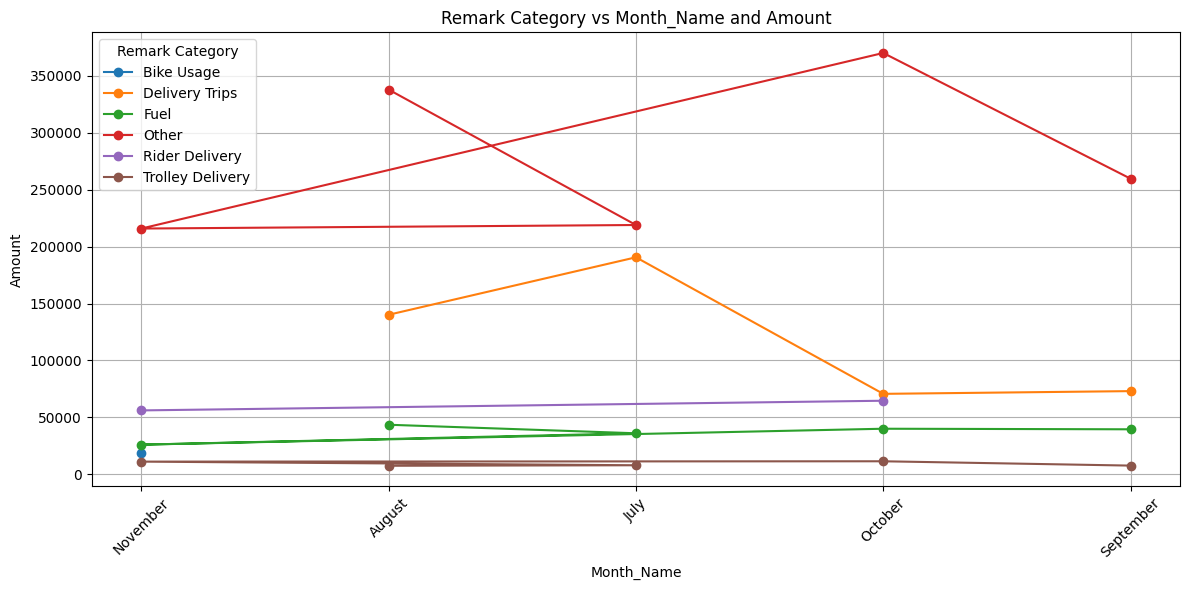

In [24]:
grouped_df = df.groupby(['Remark_Category', 'Month_Name'], as_index=False)['Amount'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))

# Looping through each Remark_Category and plotting it
for category in grouped_df['Remark_Category'].unique():
    category_data = grouped_df[grouped_df['Remark_Category'] == category]
    plt.plot(category_data['Month_Name'], category_data['Amount'], marker='o', label=category)

# Customize the plot
plt.title('Remark Category vs Month_Name and Amount')
plt.xlabel('Month_Name')
plt.ylabel('Amount')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid(True)
plt.legend(title='Remark Category')

# Display the plot
plt.tight_layout()
plt.show()

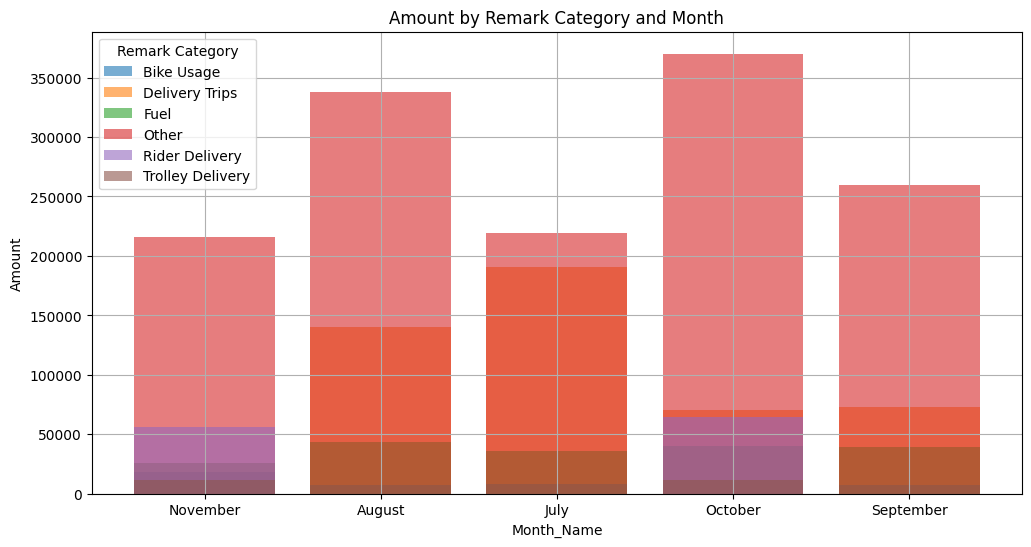

In [26]:
# Grouping data by Remark_Category and Month, and summing Amounts
grouped_df = df.groupby(['Remark_Category', 'Month_Name'], as_index=False)['Amount'].sum()

# Plot each category's data (using bar chart)
plt.figure(figsize=(12, 6))
for category in grouped_df['Remark_Category'].unique():
    category_data = grouped_df[grouped_df['Remark_Category'] == category]
    plt.bar(category_data['Month_Name'], category_data['Amount'], label=category, alpha=0.6)

# Customize the plot
plt.title('Amount by Remark Category and Month')
plt.xlabel('Month_Name')
plt.ylabel('Amount')
plt.legend(title='Remark Category')
plt.grid(True)
plt.show()
